In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
%autoreload 2

In [3]:
import sys
sys.version

'3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]'

In [1]:
from nn.NeuralNet import NN
from layers.FullyConnected import FC
from layers.Flatten import Flatten
from layers.activations.relu import Relu
from layers.Convolution import Conv
from layers.BatchNormalization import BatchNorm
from layers.Pool.MaxPool import MaxPool
from layers.Dropout import Dropout
from loss_functions.softmax_with_cross_entropy import SoftmaxCrossEntropy
from optimizers.adam import Adam
from optimizers.momentum import Momentum

import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
%matplotlib inline

In [2]:
# Load Mnist dataset
(trainingImages, trainingLabels), (testImages, testLabels) = datasets.mnist.load_data()

In [3]:
def showRandomImage(trainingImages):
    i = np.random.randint(trainingImages.shape[0])
    plt.imshow(trainingImages[i],cmap=plt.get_cmap('gray'))

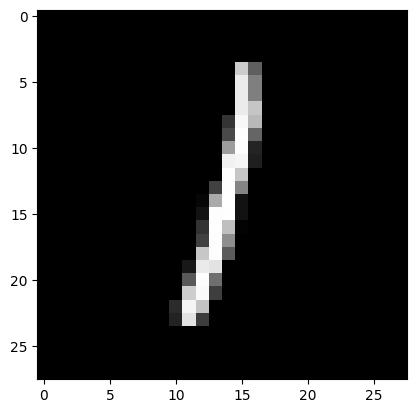

In [4]:
showRandomImage(trainingImages)

In [5]:
# Normalize Image
trainingImages =  trainingImages.astype(np.float32) / 255

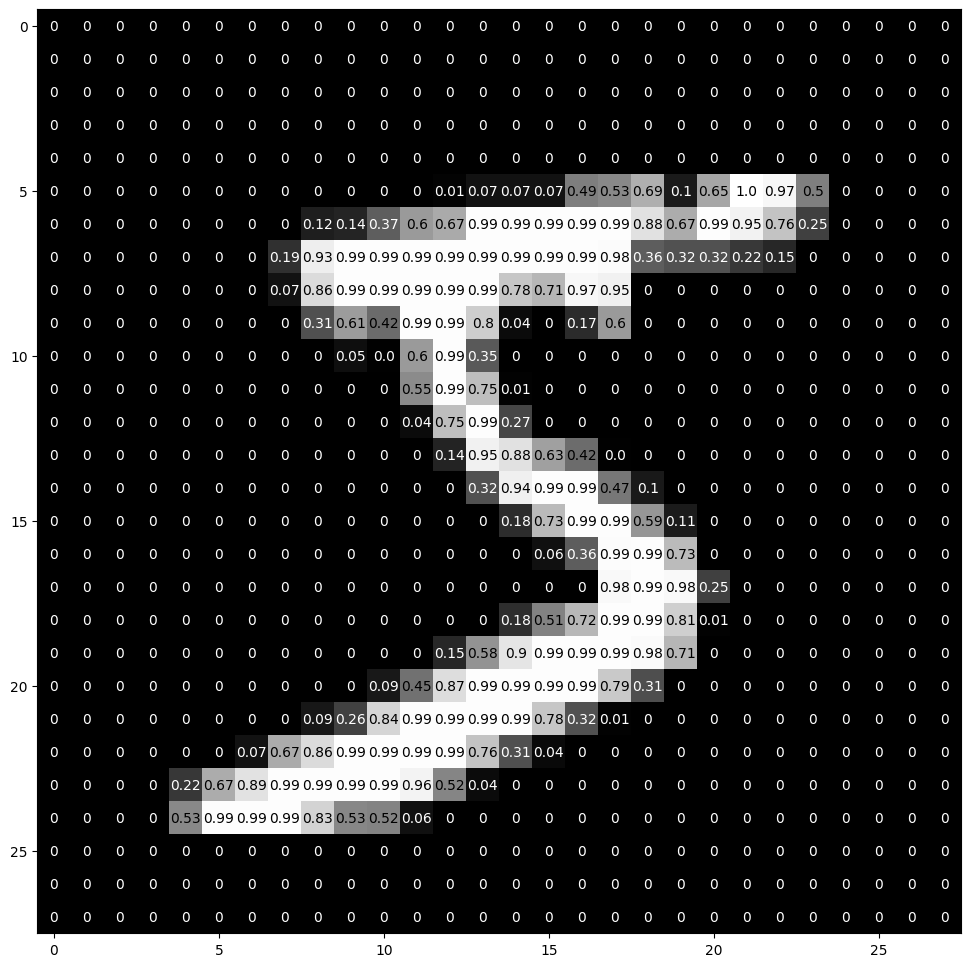

In [6]:
# View an Image in more details
img = np.squeeze(trainingImages[0])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [7]:
#Create model to train network
batch_size = 128
import cupy as cp
trainingImages = cp.array(trainingImages)
trainingLabels = cp.array(trainingLabels)

layers = [
    Flatten((28, 28)),
    FC(784, 500),
    Relu(500),
    Dropout(500, 0.5),
    FC(500, 100),
    Relu(100),
    Dropout(100, 0.5),
    FC(100,10)
]

model = NN(layers, SoftmaxCrossEntropy(), Adam())

In [8]:
# Train Model
learning_rate = lambda epoch: 0.0001 if epoch > 10 else 0.001
loss, validation_loss, validation_accuracy = model.train(trainingImages, trainingLabels, 0.2, batch_size, 20, learning_rate, 1)

The validation loss is  0.20708726  Accuracy:  93.88333333333334
The loss after  1  iterations, learning rate is 0.001 iterations is  0.51200265  using  8.929274099995382
The validation loss is  0.15441483  Accuracy:  95.21666666666667
The loss after  2  iterations, learning rate is 0.001 iterations is  0.22642298  using  11.55289619998075
The validation loss is  0.12505604  Accuracy:  96.23333333333333
The loss after  3  iterations, learning rate is 0.001 iterations is  0.17231952  using  14.058809800015297
The validation loss is  0.11552657  Accuracy:  96.50833333333334
The loss after  4  iterations, learning rate is 0.001 iterations is  0.14568233  using  16.707799300027546
The validation loss is  0.09856501  Accuracy:  97.05833333333334
The loss after  5  iterations, learning rate is 0.001 iterations is  0.12456544  using  19.187669900013134
The validation loss is  0.10000728  Accuracy:  97.24166666666666
The loss after  6  iterations, learning rate is 0.001 iterations is  0.110410

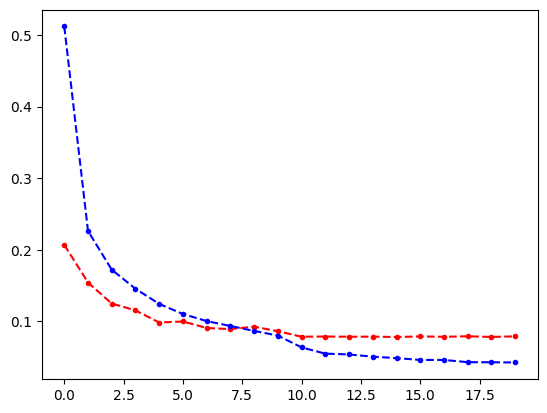

In [9]:
plt.plot(validation_loss, 'r', linestyle="--", marker=".")
plt.plot(loss, 'b', linestyle = "--", marker=".")
plt.show()

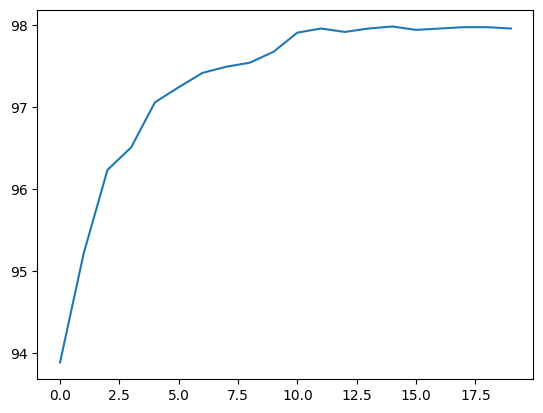

In [10]:
plt.plot(validation_accuracy)

#CIFAR-10 

In [4]:
(trainingImages, trainingLabels), (testImages, testLabels) = datasets.cifar100.load_data()
trainingLabels = trainingLabels.reshape(-1)
testLabels = testLabels.reshape(-1)

In [5]:
np.max(trainingImages[0])

255

In [6]:
trainingImages = trainingImages.astype(np.float32) / 255
testImages = testImages.astype(np.float32) / 255

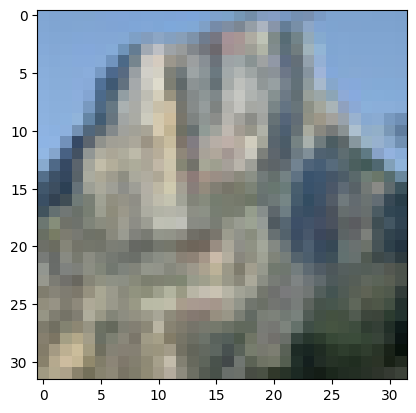

In [7]:
showRandomImage(trainingImages)

In [8]:
import cupy as cp


trainingImages = cp.array(trainingImages)
trainingLabels = cp.array(trainingLabels)
testImages = cp.array(testImages)
testLabels = cp.array(testLabels)

In [9]:
# create the model
batch_size = 128



layers = [
    Conv((32,32,3), (4,4), 32),
    BatchNorm((29,29,32)),
    Relu((29,29,32)),
    Conv((29,29,32), (3,3), 32, stride=2),
    BatchNorm((14,14,32)),
    Relu((14,14,32)),
    Dropout((14,14,32), 0.5),
    Conv((14,14,32), (3,3),64),
    BatchNorm((12,12,64)),
    Relu((12,12,64)),
    Conv((12,12,64), (4,4), 128),
    BatchNorm((9,9,128)),
    Relu((9,9,128)),
    Dropout((9,9,128), 0.5),
    Conv((9,9,128),(3,3), 256, stride=2),
    BatchNorm((4,4,256)),
    Relu((4,4,256)),
    # Dropout((22,22,32), 0.25),
    Flatten((4,4,256)),
    Dropout(4096, 0.5),
    FC(4096, 1000),
    BatchNorm(1000),
    Relu(1000),
    Dropout(1000, 0.5),
    FC(1000, 100),
]

# layers = [
#     Conv((32,32,3), (3,3), 16),
#     # BatchNorm((30,30,16)),
#     Relu((30,30,16)),
# #     Dropout((30,30,16), 0.25),
#     Conv((30,30,16), (3,3), 16),
#     # BatchNorm((28,28,16)),
#     Relu((28,28,16)),
#     MaxPool((28,28,16), 2, 2),
#     Conv((14,14,16), (3,3),32),
#     # BatchNorm((12,12,32)),
#     Relu((12,12,32)),
#     # Dropout((12,12,64), 0.1),
#     Conv((12,12,32), (3,3), 64),
#     # BatchNorm((10,10,64)),
#     Relu((10,10,64)),
#     MaxPool((10,10,64), 2, 2),
#     Conv((5,5,64),(3,3), 128),
#     # BatchNorm((3,3,128)),
#     Relu((3,3,128)),
# #     Dropout((22,22,32), 0.25),
#     Flatten((3,3,128)),
#     # Dropout(768, 0.5),
#     FC(1152, 512),
#     # BatchNorm(512),
#     Relu(512),
#     # Dropout(512, 0.5),
#     FC(512, 10),
# ]

# layers = [
#     Conv((32,32,3), (3,3), 8),
#     Relu((30,30,8)),
#     MaxPool((30,30,8), 2, 2),
#     Flatten((15,15,8)),
#     FC(1800, 500),
#     Relu(500),
#     # Dropout(500, 0.5),
#     FC(500, 10)
#     # Conv((30,30,8), (3,3), 8),
#     # Relu((28,28,8)),
#     # Dropout((28,28,8), 0.25),
    
# ]

model = NN(layers, SoftmaxCrossEntropy(), Adam())

In [10]:
learning_rate = lambda epoch: 0.001 if epoch < 150 else 0.0001
loss, validation_loss, validation_accuracy = model.train(trainingImages, trainingLabels, 0.2, batch_size, 15, learning_rate)

The validation loss is  3.47898  Accuracy:  17.2
The loss after  1  iterations, learning rate is 0.001 iterations is  3.8904781  using  27.272354300000018
The validation loss is  3.1101425  Accuracy:  23.68
The loss after  2  iterations, learning rate is 0.001 iterations is  3.3272574  using  47.50606630000004
The validation loss is  2.8842444  Accuracy:  28.25
The loss after  3  iterations, learning rate is 0.001 iterations is  3.014669  using  67.82947230000002
The validation loss is  2.7884426  Accuracy:  29.81
The loss after  4  iterations, learning rate is 0.001 iterations is  2.7887151  using  88.21448520000001
The validation loss is  2.720591  Accuracy:  30.77
The loss after  5  iterations, learning rate is 0.001 iterations is  2.638382  using  108.61903840000002
The validation loss is  2.4005077  Accuracy:  37.24
The loss after  6  iterations, learning rate is 0.001 iterations is  2.51154  using  129.08953050000002
The validation loss is  2.3443596  Accuracy:  38.56
The loss af

In [19]:
# Release memory
del trainingImages, trainingLabels
cp._default_memory_pool.free_all_blocks()

In [59]:
model.getValidationStats(testImages, testLabels, 128)

(array(1.8231758, dtype=float32), array(55.49))

In [2]:
import torch.nn as nn
import torch
import cupy as cp

In [14]:
inp = np.array([0.1,0.2,0.6,0.7,0.9,0.4, 0.8])
(inp < 0.2) / 0.2

array([5., 0., 0., 0., 0., 0., 0.])

In [27]:
x = datasets.cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


In [29]:
(train, label) = x[0]

In [30]:
train.shape

(50000, 32, 32, 3)

In [34]:
np.max(label)

99

In [10]:
a = cp.array([2,3,4])
all = cp.sum(a) / 2
all.astype(cp.float32)

array(4.5, dtype=float32)

In [19]:
pool = nn.MaxPool2d(2, 2)

In [ ]:
before = np.array([[[[2, 0],
   [5, 7],
   [1, 9],
   [1, 6]],

  [[1, 6],
   [8, 1],
   [5, 7],
   [3, 4]],

  [[6, 1],
   [8, 8],
   [7, 7],
   [5, 6]]]])
before.shape

In [ ]:
# x = np.transpose(before, (0,2,3,1))
x = np.random.randint(20, size=(1,2,2,3))
torch_x = torch.Tensor(np.transpose(x, (0,3,1,2)))
torch_x.requires_grad_()
cp_x = cp.array(x)
# print(torch_x)

In [ ]:
m = MaxPool((x.shape[1:]), 2,2)

In [ ]:
torch_ans = pool(torch_x)
torch_ans.retain_grad()
# print(torch_ans.shape)
# print(torch_ans)
print()
# final_ans = np.int32(np.transpose(torch_ans.numpy(), (0,2,3,1)))
# print(final_ans.shape)
# final_ans

In [ ]:
max_torch = m.forward_pass(cp_x).get()
print(max_torch.shape)
# max_torch

In [ ]:
cp_ans = m.backward_pass(cp.ones((1,1,1,3)))

In [ ]:
cp_ans = cp_ans.transpose(0,3,1,2)
print(cp_x.transpose(0,3,1,2))
# print(max_torch.transpose(0,3,1,2))
print(cp_ans)

In [ ]:
summation = torch.sum(torch_ans)

In [ ]:
summation.backward()

In [ ]:
print(torch_x.grad)
print(torch_x)
# torch_ans.shape

In [19]:
x = np.array([[0.003, 3, 8, 14], [0.01, 0.1, 3, 10]])
exp_x = np.exp(x)

print(exp_x)

exp_x/np.sum(exp_x, axis=1, keepdims=True)

[[1.00300450e+00 2.00855369e+01 2.98095799e+03 1.20260428e+06]
 [1.01005017e+00 1.10517092e+00 2.00855369e+01 2.20264658e+04]]


array([[8.31950264e-07, 1.66601124e-05, 2.47257991e-03, 9.97509928e-01],
       [4.58100341e-05, 5.01241613e-05, 9.10963793e-04, 9.98993102e-01]])

In [20]:
p = x - np.max(x, axis=1, keepdims=True)
exp_p = np.exp(p)

print(exp_p)

exp_p/np.sum(exp_p, axis=1, keepdims=True)

[[8.34027051e-07 1.67017008e-05 2.47875218e-03 1.00000000e+00]
 [4.58562066e-05 5.01746821e-05 9.11881966e-04 1.00000000e+00]]


array([[8.31950264e-07, 1.66601124e-05, 2.47257991e-03, 9.97509928e-01],
       [4.58100341e-05, 5.01241613e-05, 9.10963793e-04, 9.98993102e-01]])